In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.express as px
from sklearn.decomposition import PCA
from sklearn.model_selection import train_test_split
from sklearn.svm import LinearSVR,SVR
#from lightgbm import LGBMRegressor
from sklearn.linear_model import LinearRegression,Ridge,Lasso
from xgboost import XGBRegressor
#from Catboost import CatBoostRegressor
from sklearn.ensemble import RandomForestRegressor , GradientBoostingRegressor
from sklearn.neural_network import MLPRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.metrics import r2_score
from sklearn.preprocessing import StandardScaler
import warnings
warnings.filterwarnings(action='ignore')


In [2]:
#load data
data=pd.read_csv("train.csv")
data.head()

,Employee ID,Date of Joining,Gender,Company Type,WFH Setup Available,Designation,Resource Allocation,Mental Fatigue Score,Burn Rate
0,fffe32003000360033003200,2008-09-30,Female,Service,No,2.0,3.0,3.8,0.16
1,fffe3700360033003500,2008-11-30,Male,Service,Yes,1.0,2.0,5.0,0.36
2,fffe31003300320037003900,2008-03-10,Female,Product,Yes,2.0,NaN,5.8,0.49
3,fffe32003400380032003900,2008-11-03,Male,Service,Yes,1.0,1.0,2.6,0.20
4,fffe31003900340031003600,2008-07-24,Female,Service,No,3.0,7.0,6.9,0.52


In [3]:
#describing dataset
data.describe()

,Designation,Resource Allocation,Mental Fatigue Score,Burn Rate
count,22750.000000,21369.000000,20633.000000,21626.000000
mean,2.178725,4.481398,5.728188,0.452005
std,1.135145,2.047211,1.920839,0.198226
min,0.000000,1.000000,0.000000,0.000000
25%,1.000000,3.000000,4.600000,0.310000
50%,2.000000,4.000000,5.900000,0.450000
75%,3.000000,6.000000,7.100000,0.590000
max,5.000000,10.000000,10.000000,1.000000


In [4]:
#convert into datatime datatype
data["Date of Joining"]=pd.to_datetime(data["Date of Joining"])

In [5]:
#show the no.of rows and coloumns
data.shape

(22750, 9)

In [6]:
#general information
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 22750 entries, 0 to 22749
Data columns (total 9 columns):
 #   Column                Non-Null Count  Dtype         
---  ------                --------------  -----         
 0   Employee ID           22750 non-null  object        
 1   Date of Joining       22750 non-null  datetime64[ns]
 2   Gender                22750 non-null  object        
 3   Company Type          22750 non-null  object        
 4   WFH Setup Available   22750 non-null  object        
 5   Designation           22750 non-null  float64       
 6   Resource Allocation   21369 non-null  float64       
 7   Mental Fatigue Score  20633 non-null  float64       
 8   Burn Rate             21626 non-null  float64       
dtypes: datetime64[ns](1), float64(4), object(4)
memory usage: 1.6+ MB


In [7]:
#top 5 rows
data.head()

,Employee ID,Date of Joining,Gender,Company Type,WFH Setup Available,Designation,Resource Allocation,Mental Fatigue Score,Burn Rate
0,fffe32003000360033003200,2008-09-30,Female,Service,No,2.0,3.0,3.8,0.16
1,fffe3700360033003500,2008-11-30,Male,Service,Yes,1.0,2.0,5.0,0.36
2,fffe31003300320037003900,2008-03-10,Female,Product,Yes,2.0,NaN,5.8,0.49
3,fffe32003400380032003900,2008-11-03,Male,Service,Yes,1.0,1.0,2.6,0.20
4,fffe31003900340031003600,2008-07-24,Female,Service,No,3.0,7.0,6.9,0.52


In [8]:
#all columns in dataset
data.columns

Index(['Employee ID', 'Date of Joining', 'Gender', 'Company Type',
       'WFH Setup Available', 'Designation', 'Resource Allocation',
       'Mental Fatigue Score', 'Burn Rate'],
      dtype='object')

In [9]:
#check for null values
data.isna().sum()

Employee ID                0
Date of Joining            0
Gender                     0
Company Type               0
WFH Setup Available        0
Designation                0
Resource Allocation     1381
Mental Fatigue Score    2117
Burn Rate               1124
dtype: int64

In [10]:
#check for duplicate values
data.duplicated().sum()

np.int64(0)

In [11]:
#unique values
for i,col in enumerate(data.columns):
  print(f"\n\n{data[col].unique()}")
  print(f"\n{data[col].value_counts()}\n\n")




['fffe32003000360033003200' 'fffe3700360033003500'
 'fffe31003300320037003900' ... 'fffe390032003000'
 'fffe33003300320036003900' 'fffe3400350031003800']

Employee ID
fffe3400350031003800        1
fffe32003000360033003200    1
fffe3700360033003500        1
fffe31003300320037003900    1
fffe32003400380032003900    1
                           ..
fffe31003000380035003800    1
fffe31003500350030003400    1
fffe33003200360037003000    1
fffe31003700350033003100    1
fffe33003100330036003300    1
Name: count, Length: 22750, dtype: int64




<DatetimeArray>
['2008-09-30 00:00:00', '2008-11-30 00:00:00', '2008-03-10 00:00:00',
 '2008-11-03 00:00:00', '2008-07-24 00:00:00', '2008-11-26 00:00:00',
 '2008-01-02 00:00:00', '2008-10-31 00:00:00', '2008-12-27 00:00:00',
 '2008-03-09 00:00:00',
 ...
 '2008-05-24 00:00:00', '2008-06-10 00:00:00', '2008-03-31 00:00:00',
 '2008-12-01 00:00:00', '2008-01-05 00:00:00', '2008-09-15 00:00:00',
 '2008-12-10 00:00:00', '2008-02-10 00:00:00', '2008-12-03 00

In [12]:
#drop unneccesary data
data=data.drop(['Employee ID'],axis=1)

In [13]:
#skewness of the attributes
intFloatdata=data.select_dtypes([int,float])
for i,col in enumerate(intFloatdata.columns):
  if(intFloatdata[col].skew()>=0.1):
    print("\n",col,"feature is positively skewed and value is:",intFloatdata[col].skew())
  elif (intFloatdata[col].skew()<= -0.1):
    print("\n",col,"feature is negtively skewed and value is:",intFloatdata[col].skew())
  else:
    print("\n",col,"feature is normally distributed and value is:",intFloatdata[col].skew())



 Designation feature is normally distributed and value is: 0.09242138478903683

 Resource Allocation feature is positively skewed and value is: 0.20457273454318103

 Mental Fatigue Score feature is negtively skewed and value is: -0.4308950578815428

 Burn Rate feature is normally distributed and value is: 0.045737370909640515


In [14]:
#replace null values with mean for numeric columns only
numeric_data = data.select_dtypes(include=['number'])
numeric_data.fillna(numeric_data.mean(), inplace=True)
data[numeric_data.columns] = numeric_data # Update original DataFrame with filled values

In [15]:
#check for null values
data.isna().sum()

Date of Joining         0
Gender                  0
Company Type            0
WFH Setup Available     0
Designation             0
Resource Allocation     0
Mental Fatigue Score    0
Burn Rate               0
dtype: int64

In [16]:
#show the correlation
# Select only numeric columns before calculating correlations
numeric_data = data.select_dtypes(include=['number'])
numeric_data.corr()

,Designation,Resource Allocation,Mental Fatigue Score,Burn Rate
Designation,1.000000,0.852046,0.656445,0.719284
Resource Allocation,0.852046,1.000000,0.739268,0.811062
Mental Fatigue Score,0.656445,0.739268,1.000000,0.878217
Burn Rate,0.719284,0.811062,0.878217,1.000000


In [17]:
#plotting
#!pip install nbformat==4.2.0
import nbformat
print(nbformat.__version__)
corr = data.select_dtypes(include=['number']).corr() # Select numeric columns only for correlation calculation
#sns.set(rc={'figure.figsize':(14,12)})
fig=px.imshow(corr,text_auto=True,aspect="auto")
#fig.show()

5.10.4


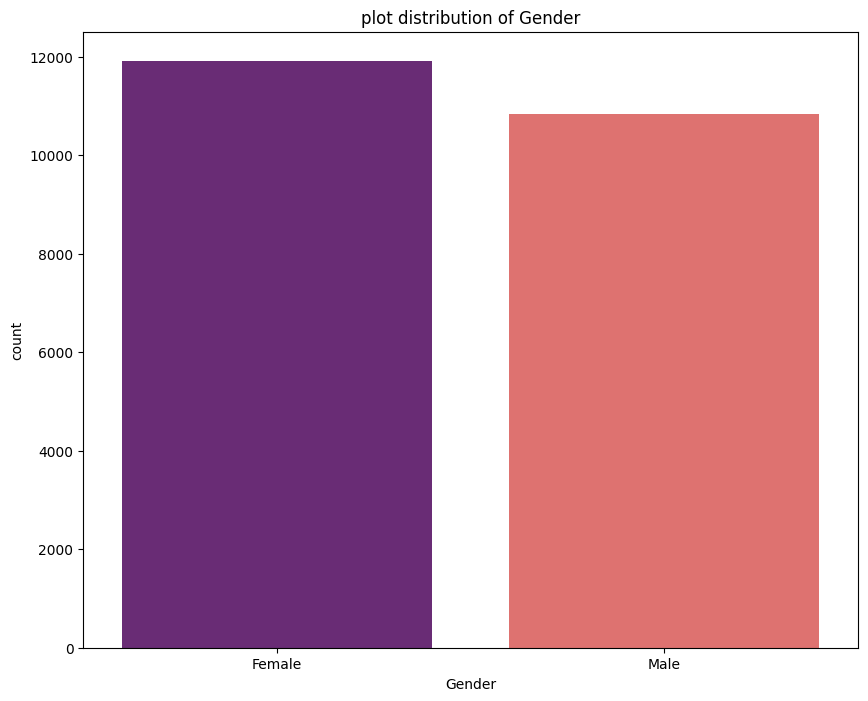

In [18]:
#count plot distribution of 'gender'
plt.figure(figsize=(10,8))
sns.countplot(x="Gender",data=data,palette="magma")
plt.title("plot distribution of Gender")
plt.show()

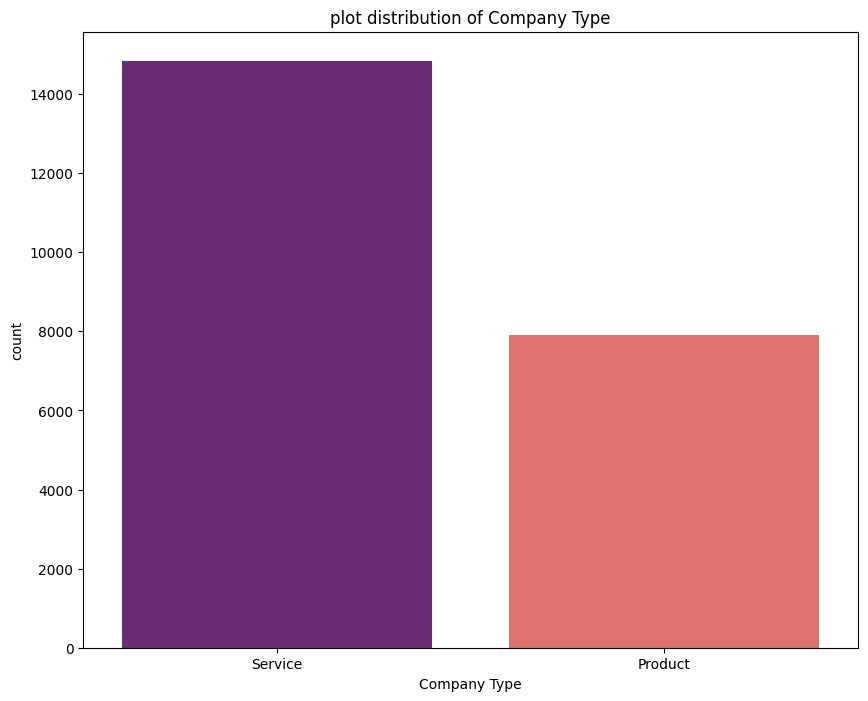

In [19]:
#count plot distribution of 'company type'
plt.figure(figsize=(10,8))
sns.countplot(x="Company Type",data=data,palette="magma")
plt.title("plot distribution of Company Type")
plt.show()

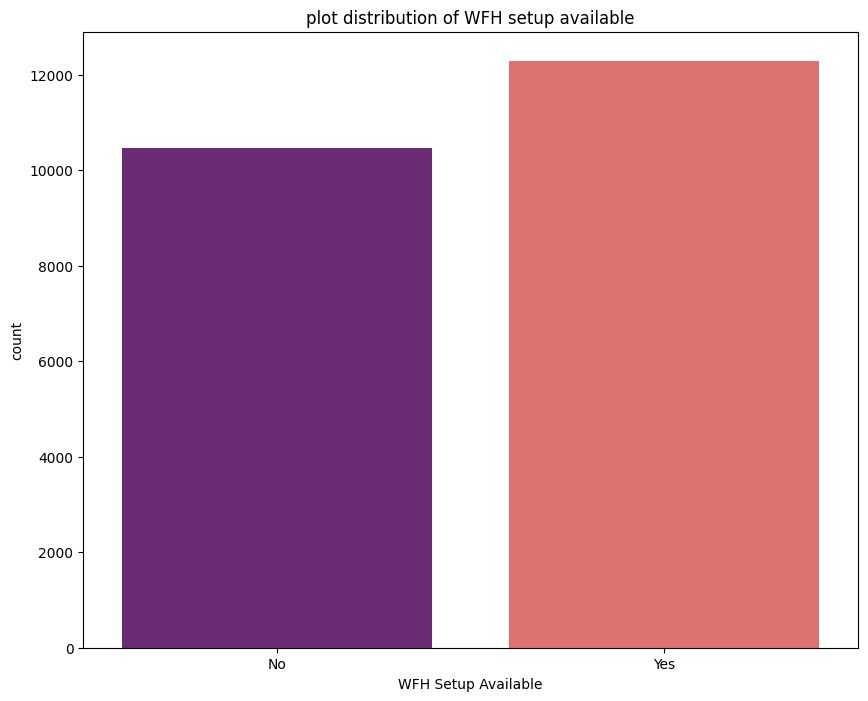

In [20]:
#count plot distribution of 'WFH'
plt.figure(figsize=(10,8))
sns.countplot(x="WFH Setup Available",data=data,palette="magma")
plt.title("plot distribution of WFH setup available")
plt.show()

In [21]:
#count-plot distribution of attributes
histo=data.loc[:,'Date of Joining':'Burn Rate']
histo=histo.select_dtypes([int,float])
for i,j in enumerate(histo.columns):
  fig=px.histogram(histo,x=j,title="plot distribution of"+j,color_discrete_sequence=['indianred'])
  fig.update_layout(bargap=0.2)
  fig.show()

In [22]:
#Binary encoding
data['Gender']=data['Gender'].replace({'Female':0,'Male':1})
data['Company Type']=data['Company Type'].replace({'Product':0,'Service':1})
data['WFH Setup Available']=data['WFH Setup Available'].replace({'No':0,'Yes':1})

In [23]:
#check assigned values for gender
gn=data.groupby('Gender')
gn=gn['Gender']
gn.first()

Gender
0    0
1    1
Name: Gender, dtype: int64

In [24]:
#show last 10 rows
data.tail(10)

,Date of Joining,Gender,Company Type,WFH Setup Available,Designation,Resource Allocation,Mental Fatigue Score,Burn Rate
22740,2008-09-05,0,0,0,3.0,6.0,7.300000,0.550000
22741,2008-01-07,1,0,0,2.0,5.0,6.000000,0.452005
22742,2008-07-28,1,0,0,3.0,5.0,8.100000,0.690000
22743,2008-12-15,0,0,1,1.0,3.0,6.000000,0.480000
22744,2008-05-27,1,0,0,3.0,7.0,6.200000,0.540000
22745,2008-12-30,0,1,0,1.0,3.0,5.728188,0.410000
22746,2008-01-19,0,0,1,3.0,6.0,6.700000,0.590000
22747,2008-11-05,1,1,1,3.0,7.0,5.728188,0.720000
22748,2008-01-10,0,1,0,2.0,5.0,5.900000,0.520000
22749,2008-01-06,1,0,0,3.0,6.0,7.800000,0.610000


In [25]:
#feature selection
col=['Designation','Resource Allocation','Mental Fatigue Score','Gender','Company Type','WFH Setup Available']
x=data[col]
y=data['Burn Rate']

In [26]:
print(x)

       Designation  Resource Allocation  Mental Fatigue Score  Gender  \
0              2.0             3.000000              3.800000       0   
1              1.0             2.000000              5.000000       1   
2              2.0             4.481398              5.800000       0   
3              1.0             1.000000              2.600000       1   
4              3.0             7.000000              6.900000       0   
...            ...                  ...                   ...     ...   
22745          1.0             3.000000              5.728188       0   
22746          3.0             6.000000              6.700000       0   
22747          3.0             7.000000              5.728188       1   
22748          2.0             5.000000              5.900000       0   
22749          3.0             6.000000              7.800000       1   

       Company Type  WFH Setup Available  
0                 1                    0  
1                 1                  

In [27]:
print(y)

0        0.16
1        0.36
2        0.49
3        0.20
4        0.52
         ... 
22745    0.41
22746    0.59
22747    0.72
22748    0.52
22749    0.61
Name: Burn Rate, Length: 22750, dtype: float64


In [28]:
#PCA
pca=PCA(0.95)
x_pca=pca.fit_transform(x)
print("PCA shape:",x_pca.shape)
print("the number of features selected through PCA:",pca.n_components_)


PCA shape: (22750, 4)
the number of features selected through PCA: 4


In [29]:
#data splitting
x_train,x_test,y_train,y_test=train_test_split(x_pca,y,test_size=0.25,random_state=10)
#printing above data
print(x_train.shape,x_test.shape,y_train.shape,y_test.shape)

(17062, 4) (5688, 4) (17062,) (5688,)


In [30]:
#training the model
model=LinearSVR()
model.fit(x_train,y_train)

pre=model.predict(x_train)
r2=r2_score(y_train,pre)
test_pre=model.predict(x_test)
test_r2=r2_score(y_test,test_pre)
#accuracy score
print("Accuracy of train data:"+str(round(100*r2,4))+"%")
print("Accuracy of test data:"+str(round(100*test_r2,4))+"%")

Accuracy of train data:82.2632%
Accuracy of test data:82.0262%


In [31]:
#training the model
model3=LinearRegression()
model3.fit(x_train,y_train)

lr_pre=model3.predict(x_train)
lr_r2=r2_score(y_train,lr_pre)
lr_test_pre=model.predict(x_test)
lr_test_r2=r2_score(y_test,lr_test_pre)
#accuracy score
print("Accuracy of train data:"+str(round(100*lr_r2,4))+"%")
print("Accuracy of test data:"+str(round(100*lr_test_r2,4))+"%")

Accuracy of train data:83.1262%
Accuracy of test data:82.0262%


In [32]:
#training the model
model4=Ridge()
model4.fit(x_train,y_train)

r_pre=model4.predict(x_train)
r_r2=r2_score(y_train,r_pre)
r_test_pre=model.predict(x_test)
r_test_r2=r2_score(y_test,r_test_pre)
#accuracy score
print("Accuracy of train data:"+str(round(100*r_r2,4))+"%")
print("Accuracy of test data:"+str(round(100*r_test_r2,4))+"%")

Accuracy of train data:83.1262%
Accuracy of test data:82.0262%


In [33]:
#training the model
model5=Lasso()
model5.fit(x_train,y_train)

pre=model5.predict(x_train)
r2=r2_score(y_train,pre)
test_pre=model.predict(x_test)
test_r2=r2_score(y_test,test_pre)
#accuracy score
print("Accuracy of train data:"+str(round(100*r2,4))+"%")
print("Accuracy of test data:"+str(round(100*test_r2,4))+"%")

Accuracy of train data:0.0%
Accuracy of test data:82.0262%


In [34]:
#training the model
model6=XGBRegressor()
model6.fit(x_train,y_train)

pre=model6.predict(x_train)
r2=r2_score(y_train,pre)
test_pre=model.predict(x_test)
test_r2=r2_score(y_test,test_pre)
#accuracy score
print("Accuracy of train data:"+str(round(100*r2,4))+"%")
print("Accuracy of test data:"+str(round(100*test_r2,4))+"%")

Accuracy of train data:89.9144%
Accuracy of test data:82.0262%


In [35]:
#training the model
model7=RandomForestRegressor()
model7.fit(x_train,y_train)

pre=model7.predict(x_train)
r2=r2_score(y_train,pre)
test_pre=model.predict(x_test)
test_r2=r2_score(y_test,test_pre)
#accuracy score
print("Accuracy of train data:"+str(round(100*r2,4))+"%")
print("Accuracy of test data:"+str(round(100*test_r2,4))+"%")

Accuracy of train data:91.1938%
Accuracy of test data:82.0262%


In [36]:
#training the model
model8=GradientBoostingRegressor()
model8.fit(x_train,y_train)

pre=model8.predict(x_train)
r2=r2_score(y_train,pre)
test_pre=model.predict(x_test)
test_r2=r2_score(y_test,test_pre)
#accuracy score
print("Accuracy of train data:"+str(round(100*r2,4))+"%")
print("Accuracy of test data:"+str(round(100*test_r2,4))+"%")

Accuracy of train data:86.2639%
Accuracy of test data:82.0262%


In [37]:
#training the model
model9=MLPRegressor()
model9.fit(x_train,y_train)

pre=model9.predict(x_train)
r2=r2_score(y_train,pre)
test_pre=model.predict(x_test)
test_r2=r2_score(y_test,test_pre)
#accuracy score
print("Accuracy of train data:"+str(round(100*r2,4))+"%")
print("Accuracy of test data:"+str(round(100*test_r2,4))+"%")

Accuracy of train data:85.0936%
Accuracy of test data:82.0262%


In [38]:
#training the model
model10=SVR()
model10.fit(x_train,y_train)

pre=model10.predict(x_train)
r2=r2_score(y_train,pre)
test_pre=model.predict(x_test)
test_r2=r2_score(y_test,test_pre)
#accuracy score
print("Accuracy of train data:"+str(round(100*r2,4))+"%")
print("Accuracy of test data:"+str(round(100*test_r2,4))+"%")

Accuracy of train data:85.2048%
Accuracy of test data:82.0262%


In [39]:
#training the model
model11=KNeighborsRegressor()
model11.fit(x_train,y_train)

pre=model11.predict(x_train)
r2=r2_score(y_train,pre)
test_pre=model.predict(x_test)
test_r2=r2_score(y_test,test_pre)
#accuracy score
print("Accuracy of train data:"+str(round(100*r2,4))+"%")
print("Accuracy of test data:"+str(round(100*test_r2,4))+"%")

Accuracy of train data:88.423%
Accuracy of test data:82.0262%


In [40]:
from sklearn.tree import DecisionTreeRegressor
#training the model
model12=DecisionTreeRegressor()
model12.fit(x_train,y_train)

pre=model12.predict(x_train)
r2=r2_score(y_train,pre)
test_pre=model.predict(x_test)
test_r2=r2_score(y_test,test_pre)
#accuracy score
print("Accuracy of train data:"+str(round(100*r2,4))+"%")
print("Accuracy of test data:"+str(round(100*test_r2,4))+"%")

Accuracy of train data:91.5736%
Accuracy of test data:82.0262%
